In [1]:
using Revise

In [2]:
push!(LOAD_PATH, "/home/amir/work/mps/src/")

using KrylovKit
using SparseArrays
using LinearAlgebra
using Plots
using LaTeXStrings

using MatrixProductStateTools
using ExactDiagonalizationTools
using SymTensors
using GaussianFermions
using GutzwillerMPS

In [3]:
#include("/home/amir/work/mps/test/runtests.jl")

szvals = [6.38378e-16, -6.10623e-16, -7.49401e-16, 8.60423e-16, -3.55271e-15, 3.66374e-15, -1.66533e-15, 2.96985e-15]
norm2(mpsheis) = 1.0


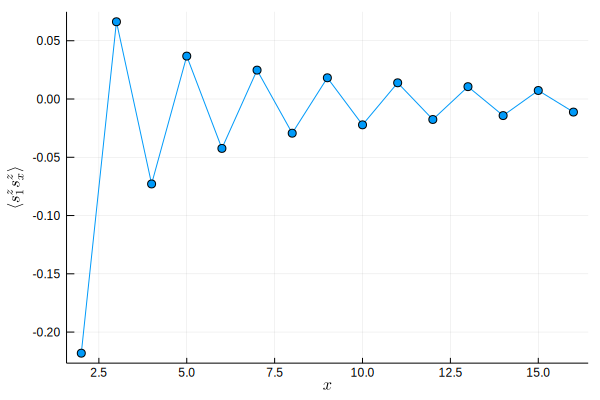

In [4]:
# exact Heisenberg AF mps
lx = 16
H = xxz_hamiltonian(lx)
es, vs = eigsolve(H, 1, :SR)
mpsheis = MatrixProductState(lx, 2, vs[1])
sz  = Matrix(sz_half)
szvals = [measure_1point(mpsheis, sz, l) for l in 1:8]
@show szvals
@show norm2(mpsheis)
data1 = measure_2point(mpsheis, sz, sz) 
plot((2:lx), data1[[half_measurement_index(lx,1,l+1) for l=1:lx-1]], 
    marker=(:circle),xaxis=(L"$x$"), yaxis=(L"$\langle s^z_1 s^z_x\rangle$"), legend=false)

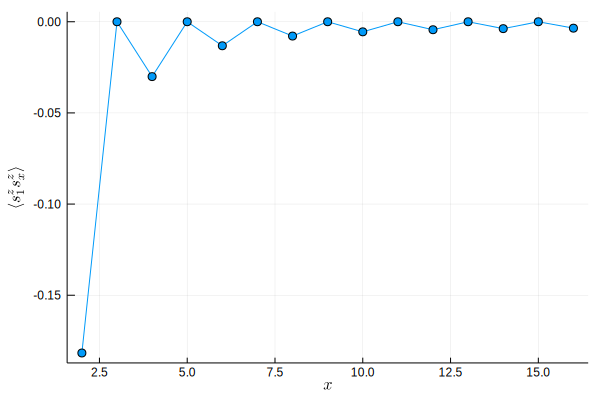

In [5]:
# Fermionic hopping mps using Fishman gates
cm = correlationmatrix(hopping_chain(lx, boundary=:OBC), div(lx,2))
fgs = generate_fishmangates(cm)
mps = fishman2mps(fgs, 100)
data = measure_2point(mps, sz, sz) 
plot((2:lx), real.(data[[half_measurement_index(lx,1,l+1) for l=1:lx-1]]),
    marker=(:circle),xaxis=(L"$x$"), yaxis=(L"$\langle s^z_1 s^z_x\rangle$"), legend=false)

In [6]:
# zip and gutzwiller method
mpsgutz = zipandgutzwiller!(mps, mps);
@show norm2(mpsgutz)
normalize!(mpsgutz)

norm2(mpsgutz) = 0.0007097057996915473


1-element Array{Float64,1}:
 0.9999999999999999

mps_dims_are_consistent(mpsgutz) = true
norm2(mpsgutz) = 0.9999999999999963


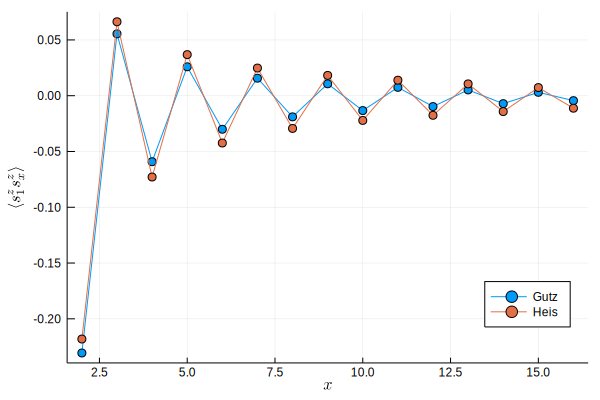

In [7]:
@show mps_dims_are_consistent(mpsgutz)
data = measure_2point(mpsgutz, sz, sz) 
data = real.(data ./ norm2(mpsgutz))
@show norm2(mpsgutz)
p = plot(xaxis=(L"$x$"), yaxis=(L"$\langle s^z_1 s^z_x\rangle$"), legend=:bottomright)
plot!(p, [2:lx], data[[half_measurement_index(lx,1,l+1) for l=1:lx-1]], marker=(:circle), label="Gutz")
plot!(p, [2:lx], data1[[half_measurement_index(lx,1,l+1) for l=1:lx-1]], marker=(:circle), label="Heis")

In [8]:
entgutz = entanglemententropy(mpsgutz);
entheis = entanglemententropy(mpsheis);

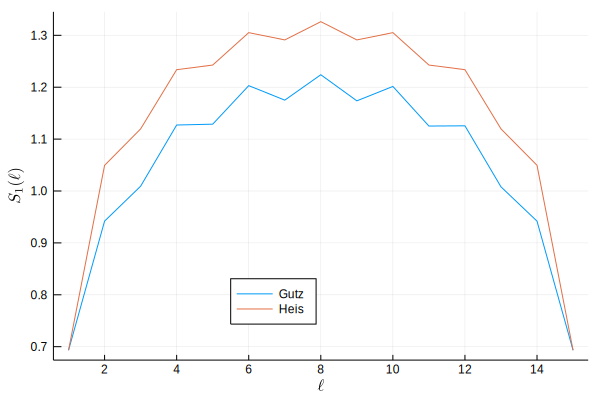

In [9]:
p = plot(
    xaxis=(L"\ell"),
    yaxis=(L"S_1(\ell)"),
    legend=:bottom
)
plot!(p, entgutz, label="Gutz")
plot!(p, entheis, label="Heis")